<a href="https://colab.research.google.com/github/hanlululu/02807-Computational-tools-for-Data-Science/blob/main/Week4/exercises_week4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02807 - Week 4 Exercises, Solutions
**To learn the most, please find your own solutions before conferring with the ones provided below**

Alternative solutions here: https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner


## Learning objectives:

* Get hands-on experience preparing data and training models with sklearn

## Readings:


* [Chapter 5: Machine learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html). Python Data Science Handbook.
* [sklearn tutorials](https://scikit-learn.org/stable/tutorial/index.html). Sklearn's own tutorials.


## Exercises:

* This week, you'll work on an introductory machine learning task from Kaggle.

* It's a very nice challenge to dive into machine learning and get the basics of data preparation and model training. 

* Of course, you can use other machine learning frameworks besides sklearn if you wish to do so.


---




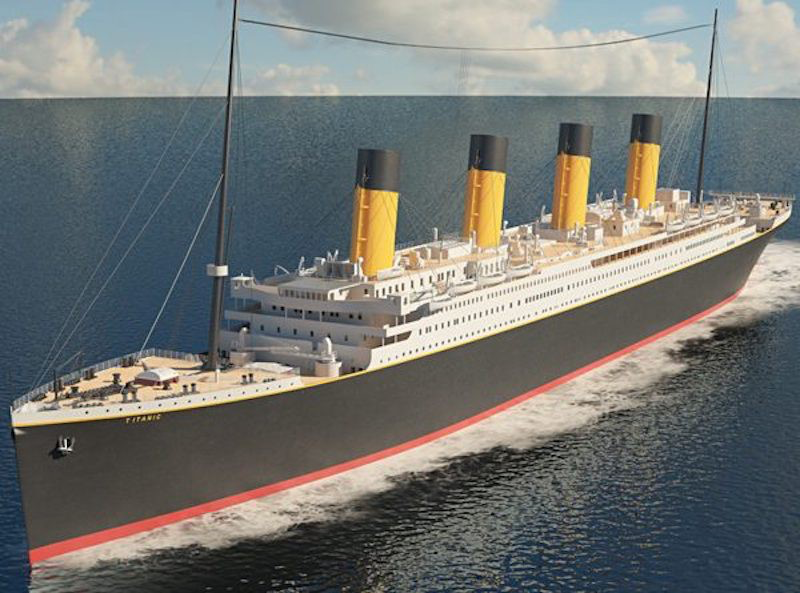

# Titanic survival problem

In this exercise you should use scikit-learn to train a model you can use for predicting survival on the Titanic.

Here's the description of the prediction task: https://www.kaggle.com/c/titanic

* For inspiration, you may look at how [others](https://www.kaggle.com/c/titanic/notebooks) have done this. 
* [This](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner) is a very clean, beginner-friendly notebook. 
* [This](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8) blog post may also serve as inspiration.



In [ ]:
#data analysis libraries 
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import train and test CSV files
train = pd.read_csv("https://courses.compute.dtu.dk/02807/2021/lectures/week4/titanic/train.csv")

#take a look at the training data
train.describe(include="all")

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [ ]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

PassengerId  Survived  Pclass                           Name     Sex  \
838          839         1       3                Chip, Mr. Chang    male   
642          643         0       3  Skoog, Miss. Margit Elizabeth  female   
557          558         0       1            Robbins, Mr. Victor    male   
158          159         0       3            Smiljanic, Mr. Mile    male   
664          665         1       3    Lindqvist, Mr. Eino William    male   

      Age  SibSp  Parch             Ticket      Fare Cabin Embarked  
838  32.0      0      0               1601   56.4958   NaN        S  
642   2.0      3      2             347088   27.9000   NaN        S  
557   NaN      0      0           PC 17757  227.5250   NaN        C  
158   NaN      0      0             315037    8.6625   NaN        S  
664  20.0      1      0  STON/O 2. 3101285    7.9250   NaN        S

In [ ]:
profile = ProfileReport(train, title="Titanic Survival", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Select features and make train valid splits

In [ ]:
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

age_mapping = {'Unknown': 0, 'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

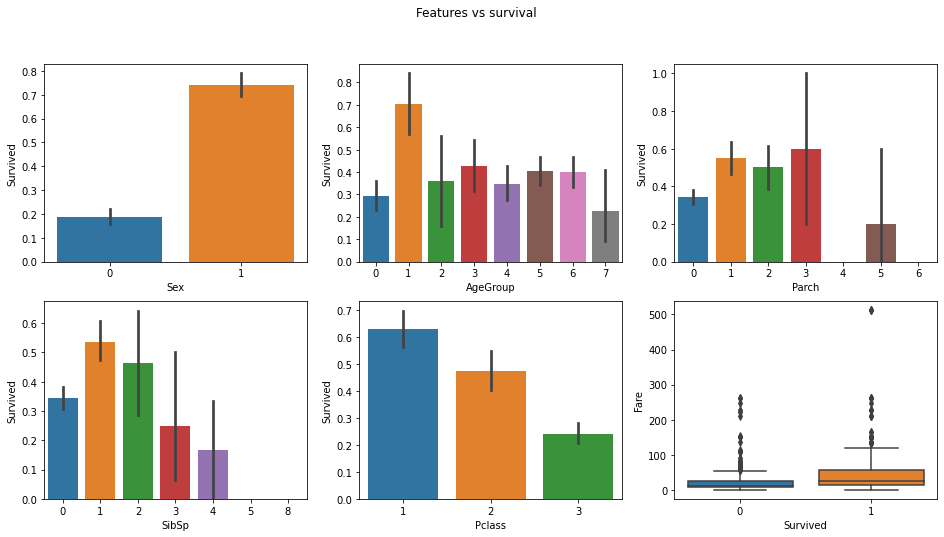

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
fig.suptitle('Features vs survival')
sns.barplot(x="Sex", y="Survived", data=train, ax=axes[0][0])
sns.barplot(x="AgeGroup", y="Survived", data=train, ax=axes[0][1])
sns.barplot(x="Parch", y="Survived", data=train, ax=axes[0][2])
sns.barplot(x="SibSp", y="Survived", data=train, ax=axes[1][0])
sns.barplot(x="Pclass", y="Survived", data=train, ax=axes[1][1])
sns.boxplot(x="Survived", y="Fare", data=train, ax=axes[1][2])

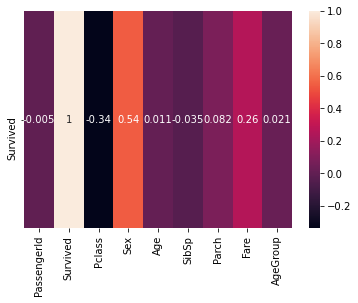

In [ ]:
# For inclusion in corr()
train.AgeGroup = train.AgeGroup.astype(int)

# Sex, PClass and Fare have some direct linear relationship with Survived
sns.heatmap(train.corr().loc['Survived'].to_frame().T, annot=True)
plt.show()

# Selecting features and split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
selected_features = ['Sex', 'AgeGroup', 'Parch', 'SibSp', 'Pclass', 'Fare']
predictors = predictors[selected_features]
target = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [ ]:
x_train.head()

Sex  AgeGroup  Parch  SibSp  Pclass     Fare
172    1         1      1      1       3  11.1333
447    0         5      0      0       1  26.5500
597    0         6      0      0       3   0.0000
204    0         3      0      0       3   8.0500
240    1         0      0      1       3  14.4542

# Training a model

You should use scikit-learn to train a model. Pick at least 5 models, train them with the data you prepared, and compare the results. For example, the following models are available in scikit-learn.

* Random Forest
* Decision Tree
* K Nearest Neighbor
* Logistic Regression
* Linear Support Vector Machine

You should use scikit-learn metrics to compare the models that you have trained. 



# Fitting models

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

* Random Forest
* Decision Tree
* K Nearest Neighbor
* Logistic Regression
* Linear Support Vector Machine

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_y_pred = gaussian.predict(x_test)
gaussian_acc = round(accuracy_score(gaussian_y_pred, y_test) * 100, 2)
print(gaussian_acc)

79.19


In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
random_forest_acc = round(accuracy_score(random_forest_y_pred, y_test) * 100, 2)
print(random_forest_acc)

83.25


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
decision_tree_acc = round(accuracy_score(decision_tree_y_pred, y_test) * 100, 2)
print(decision_tree_acc)

83.76


In [ ]:
knearest = KNeighborsClassifier()
knearest.fit(x_train, y_train)
knearest_y_pred = knearest.predict(x_test)
knearest_acc = round(accuracy_score(knearest_y_pred, y_test) * 100, 2)
print(knearest_acc)

76.14


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_regression_y_pred = logistic_regression.predict(x_test)
logistic_regression_acc = round(accuracy_score(logistic_regression_y_pred, y_test) * 100, 2)
print(logistic_regression_acc)

81.22


In [ ]:
lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
lsvc_y_pred = lsvc.predict(x_test)
lsvc_acc = round(accuracy_score(lsvc_y_pred, y_test) * 100, 2)
print(lsvc_acc)

79.7


In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
perceptron_y_pred = perceptron.predict(x_test)
perceptron_acc = round(accuracy_score(perceptron_y_pred, y_test) * 100, 2)
print(perceptron_acc)

77.16


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)
svc_acc = round(accuracy_score(svc_y_pred, y_test) * 100, 2)
print(svc_acc)

72.59


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree'],
    'Accuracy': [svc_acc, knearest_acc, logistic_regression_acc, 
              random_forest_acc, gaussian_acc, perceptron_acc, lsvc_acc, decision_tree_acc]})
models.sort_values(by='Accuracy', ascending=False).T

7              3                    2           6  \
Model     Decision Tree  Random Forest  Logistic Regression  Linear SVC   
Accuracy          83.76          83.25                81.22        79.7   

                    4           5      1                        0  
Model     Naive Bayes  Perceptron    KNN  Support Vector Machines  
Accuracy        79.19       77.16  76.14                    72.59

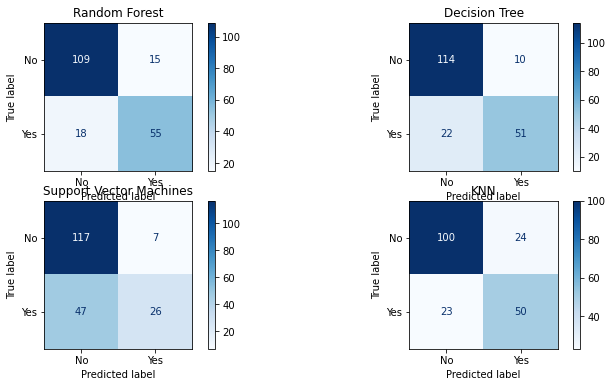

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

cm_options = {
    'labels': [0, 1], 
    'display_labels': ['No', 'Yes'], 
    'cmap':plt.cm.Blues
}

_ = plot_confusion_matrix(random_forest, x_test, y_test, ax=ax[0][0], **cm_options)
ax[0][0].set_title('Random Forest')
_ = plot_confusion_matrix(svc, x_test, y_test, ax=ax[1][0], **cm_options)
ax[1][0].set_title('Support Vector Machines')
_ = plot_confusion_matrix(decision_tree, x_test, y_test, ax=ax[0][1], **cm_options)
ax[0][1].set_title('Decision Tree')
_ = plot_confusion_matrix(knearest, x_test, y_test, ax=ax[1][1], **cm_options)
_ = ax[1][1].set_title('KNN')

# What's next?

Once you have built a model you can use it to make predictions. 

To see your model in action you can download the [unlabeled test data](https://www.kaggle.com/c/titanic/data) from Kaggle and make predictions on that.

If you want to know how well you did, you can create a Kaggle account and submit the predictions you made on the test data and put your name on the leaderboard.

In [ ]:
test = pd.read_csv("https://courses.compute.dtu.dk/02807/2021/lectures/week4/titanic/test.csv")

test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sex_mapping = {"male": 0, "female": 1}
test['Sex'] = test['Sex'].map(sex_mapping)

age_mapping = {'Unknown': 0, 'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
test['AgeGroup'] = test['AgeGroup'].map(age_mapping).astype(int)

# Fare is missing a value, imputing based on mean Fare
test.Fare = test.Fare.fillna(test.Fare.mean())

In [ ]:
kaggle_test_prediction = \
    pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': random_forest.predict(test[selected_features])})

kaggle_test_prediction.to_csv('my_submission.csv', index=False)

In [ ]:
kaggle_test_prediction.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0